In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report,r2_score
# import pandas_profiling as pp
# from pandas_profiling import*
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
import pickle

In [2]:
df=pd.read_excel("creditcarddefault.xlsx")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,default.payment.next.month
0,1,20000,2,2,1,24,2,2,-1,3913,3102,689,0,689,0,1
1,2,120000,2,2,2,26,-1,2,0,2682,1725,2682,0,1000,1000,1
2,3,90000,2,2,2,34,0,0,0,29239,14027,13559,1518,1500,1000,0
3,4,50000,2,2,1,37,0,0,0,46990,48233,49291,2000,2019,1200,0
4,5,50000,1,2,1,57,-1,0,-1,8617,5670,35835,2000,36681,10000,0


In [3]:
df.shape


(30000, 16)

In [4]:
# prof=ProfileReport(df)
# prof

In [5]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'default.payment.next.month'],
      dtype='object')

In [6]:
df.drop("ID",axis=1,inplace=True)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,default.payment.next.month
0,20000,2,2,1,24,2,2,-1,3913,3102,689,0,689,0,1
1,120000,2,2,2,26,-1,2,0,2682,1725,2682,0,1000,1000,1
2,90000,2,2,2,34,0,0,0,29239,14027,13559,1518,1500,1000,0
3,50000,2,2,1,37,0,0,0,46990,48233,49291,2000,2019,1200,0
4,50000,1,2,1,57,-1,0,-1,8617,5670,35835,2000,36681,10000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,188948,192815,208365,8500,20000,5003,0
29996,150000,1,3,2,43,-1,-1,-1,1683,1828,3502,1837,3526,8998,0
29997,30000,1,2,2,37,4,3,2,3565,3356,2758,0,0,22000,1
29998,80000,1,3,1,41,1,-1,0,-1645,78379,76304,85900,3409,1178,1


In [7]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
default.payment.next.month    0
dtype: int64

In [8]:
df['default.payment.next.month'].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

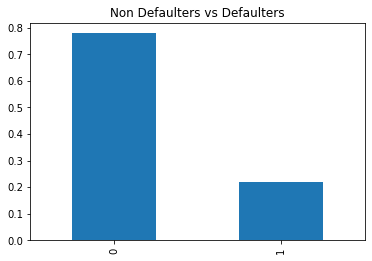

In [9]:
%matplotlib inline
df['default.payment.next.month'].value_counts(normalize=True).plot.bar()
plt.title('Non Defaulters vs Defaulters')
plt.show()

In [10]:
df.nunique()

LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
default.payment.next.month        2
dtype: int64

In [11]:
df[['SEX','EDUCATION',"MARRIAGE"]].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


In [12]:
df['MARRIAGE']=df['MARRIAGE'].replace({0:3})

In [13]:
df['EDUCATION']=df['EDUCATION'].replace({0:4,5:4,6:4})

In [14]:
def plot_categoric(cat_col):
    plt.title('{0} vs DEFAULT PROBABILITY '.format(cat_col))
    df.groupby(cat_col)['default.payment.next.month'].mean().plot.bar()
    plt.show

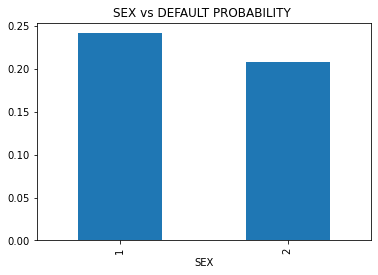

In [15]:
%matplotlib inline
plot_categoric('SEX')


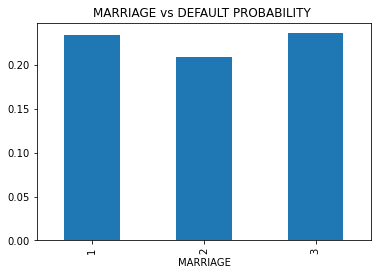

In [16]:
plot_categoric('MARRIAGE')

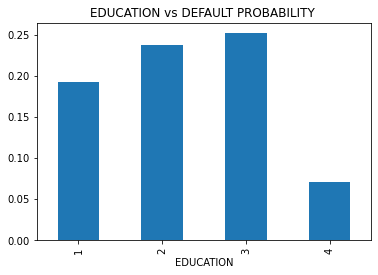

In [17]:
plot_categoric('EDUCATION')

### Limit Balance and influence on target var

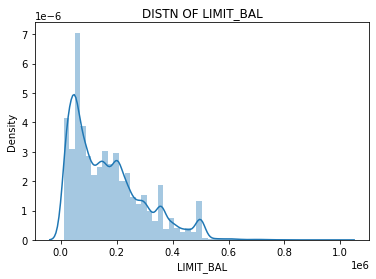

In [18]:
sns.distplot(df['LIMIT_BAL'])
plt.title('DISTN OF LIMIT_BAL')
plt.show()

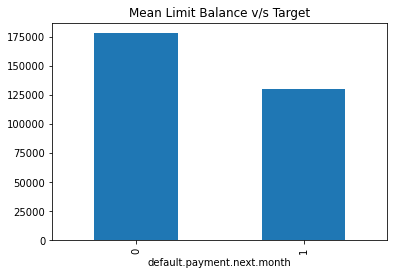

In [19]:
df.groupby('default.payment.next.month')['LIMIT_BAL'].mean().plot.bar()
plt.title('Mean Limit Balance v/s Target')
plt.show()

### Correlation And Heatmap

In [20]:
corr=df.corr()


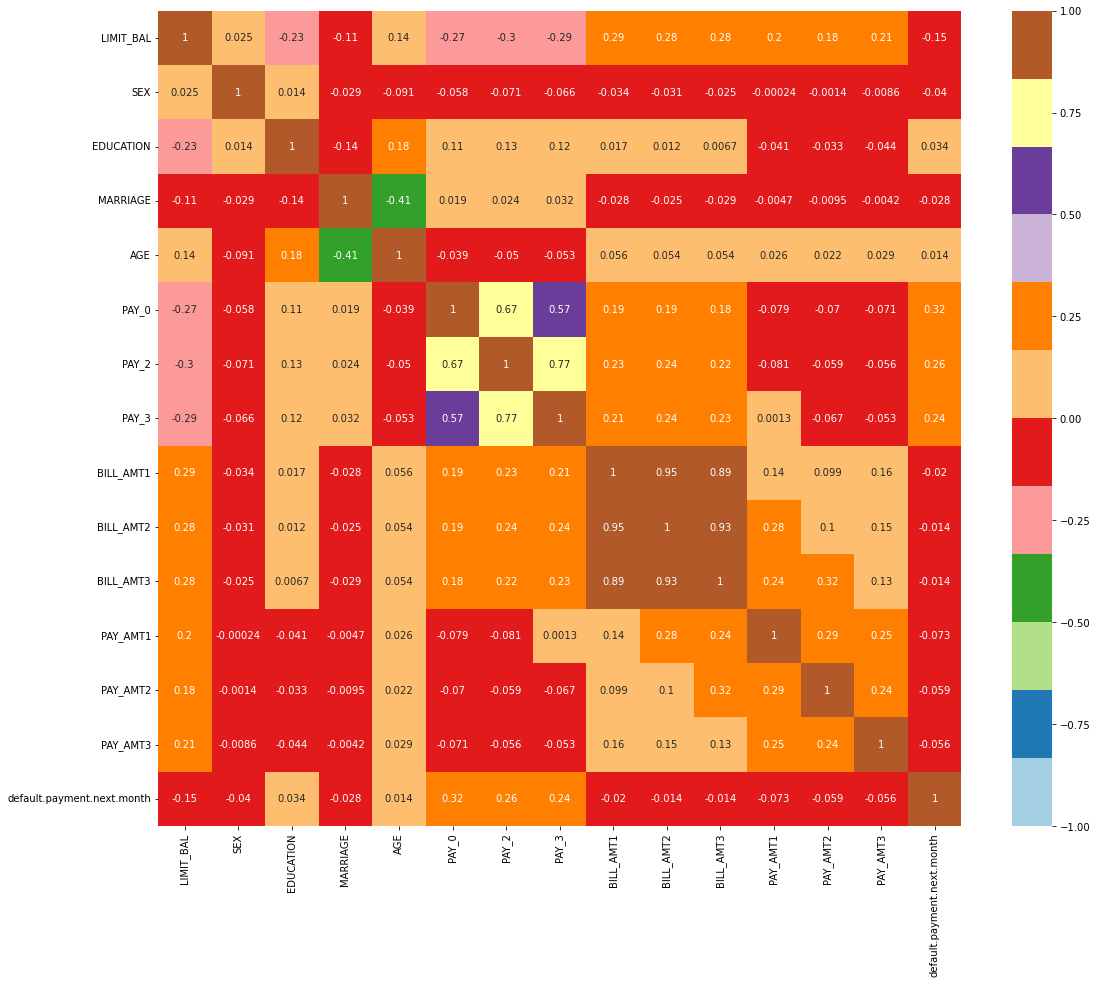

In [21]:
plt.figure(figsize=(18,15))
sns.heatmap(corr,annot=True ,vmin=-1,cmap="Paired")
plt.show()

In [22]:
x=df.iloc[:,0:14]
x

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3
0,20000,2,2,1,24,2,2,-1,3913,3102,689,0,689,0
1,120000,2,2,2,26,-1,2,0,2682,1725,2682,0,1000,1000
2,90000,2,2,2,34,0,0,0,29239,14027,13559,1518,1500,1000
3,50000,2,2,1,37,0,0,0,46990,48233,49291,2000,2019,1200
4,50000,1,2,1,57,-1,0,-1,8617,5670,35835,2000,36681,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,188948,192815,208365,8500,20000,5003
29996,150000,1,3,2,43,-1,-1,-1,1683,1828,3502,1837,3526,8998
29997,30000,1,2,2,37,4,3,2,3565,3356,2758,0,0,22000
29998,80000,1,3,1,41,1,-1,0,-1645,78379,76304,85900,3409,1178


In [23]:
y=df.iloc[:,-1]
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default.payment.next.month, Length: 30000, dtype: int64

### Train and test

In [24]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=2)

### LogisticRegreesion

In [25]:
model=LogisticRegression()

model.fit(train_x,train_y)

LogisticRegression()

In [26]:
predict_y=model.predict(test_x)

In [27]:
accuracy_score(test_y,predict_y)

0.7773333333333333

In [28]:

# accuracy_score(predict_y,test_y)

In [29]:
model.score(train_x,train_y)

0.7790416666666666

In [30]:
model.score(test_x,test_y)

0.7773333333333333

In [31]:
diff_log_re=pd.DataFrame({'Actual':test_y , 'Predicted':predict_y})
diff_log_re

,Actual,Predicted
7945,1,0
16536,0,0
26726,0,0
16333,1,0
20629,0,0
...,...,...
19544,0,0
16545,0,0
9827,0,0
8996,0,0


## DecisionTree

In [32]:
DT = DecisionTreeClassifier()

DT.fit(train_x,train_y)

DecisionTreeClassifier()

In [33]:
pred_y2 = DT.predict(test_x)

In [34]:
print("Accuracy =",accuracy_score(test_y,pred_y2))
print("Training Score =",DT.score(train_x,train_y))

Accuracy = 0.7146666666666667
Training Score = 0.999375


In [35]:
diff_dtr=pd.DataFrame({'Actual':test_y , 'Predicted':pred_y2})
diff_dtr

,Actual,Predicted
7945,1,0
16536,0,0
26726,0,0
16333,1,0
20629,0,0
...,...,...
19544,0,0
16545,0,1
9827,0,0
8996,0,0


## RandomForest

In [36]:
RF = RandomForestClassifier()

RF.fit(train_x,train_y)

RandomForestClassifier()

In [37]:
pred_y3 = RF.predict(test_x)

In [38]:
accuracy_score(test_y,pred_y3)

0.8176666666666667

In [39]:
RF.score(train_x,train_y)

0.99925

In [40]:
RF.score(test_x,test_y)

0.8176666666666667

In [41]:
confusion_matrix1 = confusion_matrix(test_y, pred_y3)
print(confusion_matrix1)

[[4392  273]
 [ 821  514]]


In [42]:
diff_rf=pd.DataFrame({'Actual':test_y , 'Predicted':pred_y3})
diff_rf.head(10)

,Actual,Predicted
7945,1,0
16536,0,0
26726,0,0
16333,1,0
20629,0,0
321,0,0
9579,0,0
27004,0,0
2360,0,0
6593,0,0


In [43]:
with open('RF.pickle','wb') as f:
    pickle.dump(RF,f)

In [44]:
with open ('RF.pickle','rb') as f:
    model=pickle.load(f)

In [45]:
input = np.array([[70000,1,2,2,30,1,2,2,65802,67369,65701,3200,0,3000]])
x=RF.predict(input)
print(x)

[1]


In [46]:
import bz2,pickle
file = bz2.BZ2File("RF1.pkl",'wb')
pickle.dump(RF,file)
file.close()
